#### Jupyter notebooks

This is a [Jupyter](http://jupyter.org/) notebook using Python.  You can install Jupyter locally to edit and interact with this notebook.

# Linear Algebra

You have all seen basic linear algebra before, but this will summarize some different ways of thinking about the fundamental operations.

Linear algebra is the study of linear transformations on vectors, which represent points in a finite dimensional space.  The matrix-vector product $y = A x$ is a linear combination of the columns of $A$.  The familiar definition,

$$ y_i = \sum_j A_{i,j} x_j $$

can also be viewed as

$$ y = \Bigg[ A_{:,0} \Bigg| A_{:,1} \Bigg| \dotsm \Bigg] \begin{bmatrix} x_0 \\ x_1 \\ \vdots \end{bmatrix}
= \Bigg[ A_{:,0} \Bigg] x_0 + \Bigg[ A_{:,1} \Bigg] x_1 + \dotsb . $$

The notation $A_{i,j}$ corresponds to the Python syntax `A[i,j]` and the colon `:` means the entire range (row or column).  So $A_{:,j}$ is the $j$th column and $A_{i,:}$ is the $i$th row.  The corresponding Python syntax is `A[:,j]` and `A[i,:]`.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def matmult1(A, x):
    """Entries of y are dot products of rows of A with x"""
    y = np.zeros_like(A[:,0])
    for i in range(len(A)):
        row = A[i,:]
        for j in range(len(row)):
            y[i] += row[j] * x[j]
    return y

A = np.array([[1,2],[3,5],[7,11]])
x = np.array([10,20])
matmult1(A, x)

array([ 50, 130, 290])

In [2]:
A, x

(array([[ 1,  2],
        [ 3,  5],
        [ 7, 11]]),
 array([10, 20]))

In [3]:
def matmult2(A, x):
    """Same idea, but more compactly"""
    y = np.zeros_like(A[:,0])
    for i,row in enumerate(A):
        y[i] = row.dot(x)
    return y

matmult2(A, x)

array([ 50, 130, 290])

In [4]:
def matmult3(A, x):
    """y is a linear expansion of the columns of A"""
    y = np.zeros_like(A[:,0])
    for j,col in enumerate(A.T):
        y += col * x[j]
    return y

matmult3(A, x)

array([ 50, 130, 290])

In [5]:
# We will use this version
A.dot(x)

array([ 50, 130, 290])

In [6]:
# Or this version (Python 3.5+)
A @ x

array([ 50, 130, 290])

### Some common terminology

* The **range** of $A$ is the space spanned by its columns.  This definition coincides with the range of a function $f(x)$ when $f(x) = A x$.
* The (right) **nullspace** of $A$ is the space of vectors $x$ such that $A x = 0$.
* The **rank** of $A$ is the dimension of its range.
* A matrix has **full rank** if the nullspace of either $A$ or $A^T$ is empty (only the 0 vector).  Equivalently, if all the columns of $A$ (or $A^T$) are linearly independent.
* A **nonsingular** (or **invertible**) matrix is a square matrix of full rank.  We call the inverse $A^{-1}$ and it satisfies $A^{-1} A = A A^{-1} = I$.

$\DeclareMathOperator{\rank}{rank} \DeclareMathOperator{\null}{null} $
If $A \in \mathbb{R}^{m\times m}$, which of these doesn't belong?
1. $A$ has an inverse $A^{-1}$
2. $\rank (A) = m$
3. $\null(A) = \{0\}$
4. $A A^T = A^T A$
5. $\det(A) \ne 0$
6. $A x = 0$ implies that $x = 0$

When we write $x = A^{-1} y$, we mean that $x$ is the unique vector such that $A x = y$.
(It is rare that we explicitly compute a matrix $A^{-1}$, though [it's not as "bad"](https://arxiv.org/abs/1201.6035) as people may have told you.)
A vector $y$ is equivalent to $\sum_i e_i y_i$ where $e_i$ are columns of the identity.
Meanwhile, $x = A^{-1} y$ means that we are expressing that same vector $y$ in the basis of the columns of $A$, i.e., $\sum_i A_{:,i} x_i$.


In [7]:
B = np.array([[2, 3],[0, 4]])
print(B)
print(B @ B.T)
print(B.T @ B)

[[2 3]
 [0 4]]
[[13 12]
 [12 16]]
[[ 4  6]
 [ 6 25]]


In [8]:
Binv = np.linalg.inv(B)
print(Binv)

[[ 0.5   -0.375]
 [ 0.     0.25 ]]


In [9]:
print(Binv @ B)
print(B @ Binv)
print(np.linalg.solve(B, B))

[[1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]]


### Vandermonde matrices

A Vandermonde matrix is one whose columns are functions evaluated at discrete points.

shape = (50, 4)


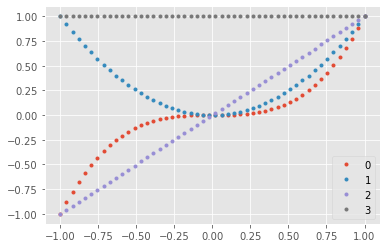

In [10]:
x = np.linspace(-1,1)
A = np.array([x**3, x**2, x, 1+0*x]).T
print('shape =', A.shape)  # This is a tall matrix with 4 columns

lines = plt.plot(x, A, '.')
plt.legend(lines, range(4))
plt.ylim((-1.1, 1.1));

* This type of matrix is very common; we can also create it with `numpy.vander`.

We can evaluate polynomials using matrix-vector multiplication.
For example,
$$ 5x^3 - 3x = \Bigg[ x^3 \Bigg|\, x^2 \Bigg|\, x \,\Bigg|\, 1 \Bigg] \begin{bmatrix}5 \\ 0 \\ -3 \\ 0 \end{bmatrix} . $$

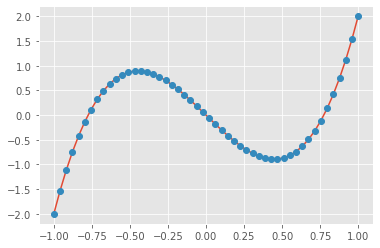

In [11]:
p = np.array([5, 0, -3, 0])
plt.plot(x, A @ p)
plt.plot(x, np.polyval(p, x), 'o');

Now suppose we know the value of a polynomial at a few points.
We can use the Vandermonde matrix to find a polynomial through those points.

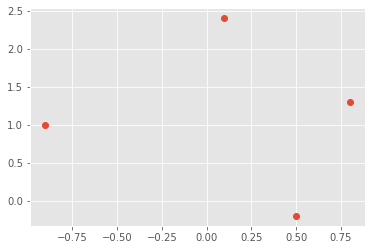

In [12]:
x1 = np.array([-0.9, 0.1, 0.5, 0.8])  # points where we know values
y = np.array([1, 2.4, -0.2, 1.3])     # values at those points

plt.plot(x1, y, 'o');

B = [[-0.729  0.81  -0.9    1.   ]
 [ 0.001  0.01   0.1    1.   ]
 [ 0.125  0.25   0.5    1.   ]
 [ 0.512  0.64   0.8    1.   ]]
p = [12.98319328 -1.74789916 -9.47605042  3.35210084]


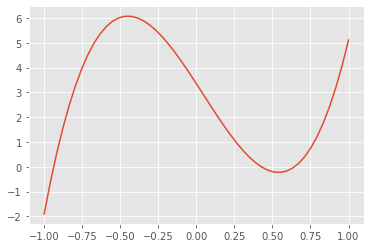

In [13]:
B = np.vander(x1)                     # Vandermonde matrix at the known points
p = np.linalg.solve(B, y)             # Compute the polynomial coefficients
plt.plot(x, A @ p)                    # Plot the polynomial evaluated at all points
print('B =', B)
print('p =', p)

Evidently $$p(x) = 12.983 x^3 - 1.748 x^2 - 9.476 x + 3.352$$
is the unique cubic polynomial that interpolates those points.
Applying $B^{-1}$ converted from the values at the marked points to the polynomial coefficients.

## Inner products and orthogonality

The **inner product**
$$ x^T y = \sum_i x_i y_i $$
of vectors (or columns of a matrix) tell us about their magnitude and about the angle.
The **norm** is induced by the inner product,
$$ \lVert x \rVert = \sqrt{x^T x} $$
and the angle $\theta$ is defined by
$$ \cos \theta = \frac{x^T y}{\lVert x \rVert \, \lVert y \rVert} . $$
Inner products are **bilinear**, which means that they satisfy some convenient algebraic properties
$$ \begin{split}
(x + y)^T z &= x^T z + y^T z \\
x^T (y + z) &= x^T y + x^T z \\
(\alpha x)^T (\beta y) &= \alpha \beta x^T y \\
\end{split} . $$
The pairwise inner products between two sets of vectors can be expressed by collecting the sets as columns in matrices and writing $A = X^T Y$ where $A_{i,j} = x_i^T y_j$.
It follows from this definition that
$$ (X^T Y)^T = Y^T X .$$

### Orthogonal matrices

If $x^T y = 0$ then we say $x$ and $y$ are **orthogonal** (or "$x$ is orthogonal to $y$").
A vector is said to be **normalized** if $\lVert x \rVert = 1$.
If $x$ is orthogonal to $y$ and $\lVert x \rVert = \lVert y \rVert = 1$ then we say $x$ and $y$ are **orthonormal**.
A square matrix with orthonormal columns is said to be an **orthogonal matrix**.
We typically use $Q$ or $U$ and $V$ for matrices that are known/constructed to be orthogonal.
Orthogonal matrices are always full rank -- the columns are linearly independent.
The inverse of a orthogonal matrix is its transpose:
$$ Q^T Q = Q Q^T = I . $$
Orthogonal matrices are a powerful building block for robust numerical algorithms.

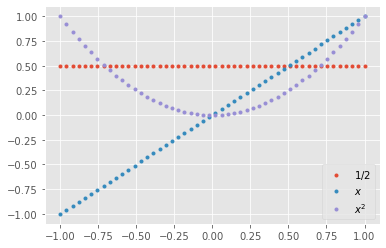

In [14]:
# Make some polynomials
a0 = A @ np.array([0, 0, 0, .5]) # .5
a1 = A @ np.array([0, 0, 1, 0])  # x
a2 = A @ np.array([0, 1, 0, 0])  # x^2

plt.plot(x, np.array([a0, a1, a2]).T, '.');
plt.legend(('$1/2$', '$x$', '$x^2$'));

#### Inner products of even and odd functions
Which of the above functions are even and which are odd?  Note that
* the integral of an odd function over a symmetric interval such as $[-1, 1]$ is zero; the same holds for a sum of the function evaluated at a symmetric set of points, and
* the product of even and odd functions is odd.

Together, this explains that even functions are orthogonal to odd functions.

In [15]:
q0 = a0 / np.linalg.norm(a0)

a1 @ q0, a2 @ q0, a2 @ a1

(-4.718447854656915e-16, 2.453227608198226, -3.552713678800501e-15)

#### What is the constant component of $a_2$?

We see above that $a_2$ is not orthogonal to $q_0$.  However, we can measure the component of $a_2$ in direction $q_0$ by $q_0^T a_2$ and can write that as a vector (e.g., to plot it or add/subtract it) via $q_0 q_0^T a_2$.

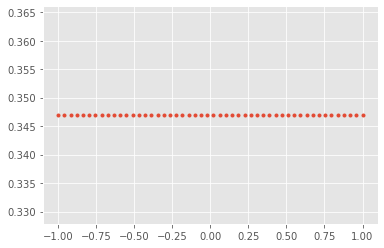

In [16]:
plt.plot(x, q0 * (q0 @ a2), '.');

Let's project that away to create a vector $x$ that is orthogonal to $q_0$.  We can use the orthogonal projection $y = (I - q_0 q_0^T) a_2 = a_2 - q_0 (q_0^T a_2)$.  We can also normalize the result and collect the vectors as columns in a matrix.

[[ 1.00000000e+00 -1.32894490e-16 -1.77240772e-16]
 [-1.32894490e-16  1.00000000e+00 -1.93779647e-16]
 [-1.77240772e-16 -1.93779647e-16  1.00000000e+00]]


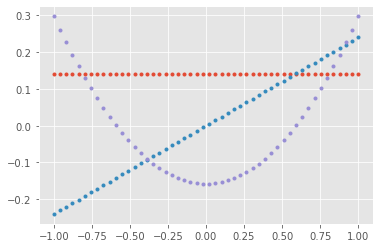

In [17]:
y = a2 - q0 * (q0 @ a2)

q1 = a1 / np.linalg.norm(a1)
q2 = y / np.linalg.norm(y)

Q = np.array([q0, q1, q2]).T
print(Q.T @ Q)
plt.plot(x, Q, '.');

In [18]:
z = np.array([[1, 2], [30, 40]])
z @ z.T, z * z.T

(array([[   5,  110],
        [ 110, 2500]]),
 array([[   1,   60],
        [  60, 1600]]))

In [19]:
z = np.array([1, 2])
np.outer(z, z), z[:, None] * z

(array([[1, 2],
        [2, 4]]),
 array([[1, 2],
        [2, 4]]))

## Gram-Schmidt Orthogonalization

Given a collection of vectors (columns of a matrix), we can find an orthogonal basis by applying the above procedure one column at a time and saving the result.  Let's think of the first two columns,
$$ \Bigg[ a_0 \, \Bigg| \, a_1 \Bigg] = \Bigg[ q_0 \,\Bigg|\, q_1 \Bigg]
\begin{bmatrix} r_{00} & r_{01} \\ 0 & r_{11} \end{bmatrix} . $$
#### Column 0
The equation for column 0 reads
$$ a_0 = q_0 r_{00} $$
and we require that $\lVert q_0 \rVert = 1$, thus
$$ r_{00} = \lVert a_0 \rVert $$
and
$$ q_0 = a_0 / r_{00} . $$
#### Column 1
This equation reads
$$ a_1 = q_0 r_{01} + q_1 r_{11} $$
where $a_1$ and $q_0$ are known and we will require that $q_0^T q_1 = 0$.
We can find the part of $a_1$ that is orthogonal to $q_0$ via
$$ (I - q_0 q_0^T) a_1 = a_1 - q_0 \underbrace{q_0^T a_1}_{r_{01}} $$
leaving a sub-problem equivalent to that of column 0.

[[ 1.00000000e+00 -4.66599631e-18 -5.83579544e-17  1.54642560e-16]
 [-4.66599631e-18  1.00000000e+00 -1.34356916e-17  1.43379430e-16]
 [-5.83579544e-17 -1.34356916e-17  1.00000000e+00 -1.54044017e-16]
 [ 1.54642560e-16  1.43379430e-16 -1.54044017e-16  1.00000000e+00]]
[[ 2.83562932e+00 -6.10622664e-16  3.81827281e+00 -1.33226763e-15]
 [ 0.00000000e+00  3.29047206e+00  1.11022302e-16  5.27186935e+00]
 [ 0.00000000e+00  0.00000000e+00  1.66365006e+00  1.52655666e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  4.71247213e+00]]
5.754298069240366e-16


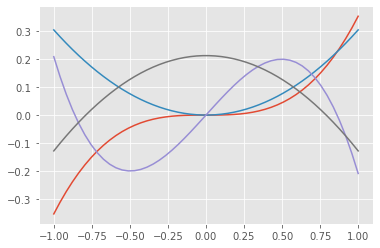

In [20]:
def gram_schmidt_naive(A):
    """Compute a QR factorization of A using the Gram-Schmidt algorithm"""
    Q = np.zeros_like(A)
    R = np.zeros((A.shape[1], A.shape[1]))
    for i in range(len(Q.T)):
        v = A[:,i].copy()
        for j in range(i):
            r = Q[:,j] @ v
            R[j,i] = r
            v -= Q[:,j] * r # "modified Gram-Schmidt"
        R[i,i] = np.linalg.norm(v)
        Q[:,i] = v / R[i,i]
    return Q, R

A = np.vander(x, 4)
Q, R = gram_schmidt_naive(A)
print(Q.T @ Q)
print(R)
print(np.linalg.norm(Q @ R - A))
plt.plot(x, Q);

In [21]:
A.shape

(50, 4)

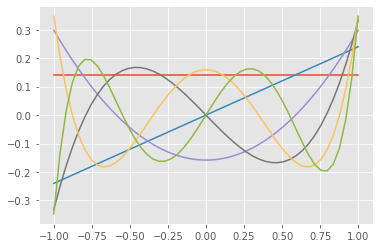

In [22]:
A = np.vander(x, 6, increasing=True)
Q, R = gram_schmidt_naive(A)
plt.plot(x, Q);

#### Full vs Reduced QR

Our algorithm computes the reduced QR factorization.  There also exists a full QR factorization, which includes an orthogonal basis for the null space of $A$.  This is sometimes useful, and is implicitly constructed by the Householder method (which we'll get to later).

<img src="img/TB-ReducedQR.png" width="40%" /> <img src="img/TB-FullQR.png" width="40%" />

### Theorem: all full-rank $m\times n$ matrices ($m \ge n$) have a unique reduced $Q R$ factorization with $R_{j,j} > 0$.

### Orthogonal polynomials

We used `x = numpy.linspace(-1,1)` which uses $m=50$ points by default.  The number 50 is arbitrary and as we use more points, our columns become better approximations of continuous functions and the vector inner product becomes an integral (up to scaling):
$$ \frac 2 m \sum_{i=1}^m p_i q_i \approx \int_{-1}^1 p(x) q(x) . $$

When we orthogonalize the monomials using this inner product, we get the [Legendre Polynomials](https://en.wikipedia.org/wiki/Legendre_polynomials) (up to scaling).  These polynomials have important applications in physics and engineering, as well as playing an important role in approximation (which we will go into in more detail).

### Solving equations using QR

To solve
$$ A x = b $$
we can compute $A = QR$ and then
$$ x = R^{-1} Q^T b . $$

This also works for non-square systems!

B = [[ 1.    -0.9    0.81  -0.729]
 [ 1.     0.1    0.01   0.001]
 [ 1.     0.5    0.25   0.125]
 [ 1.     0.8    0.64   0.512]] 
p = [ 3.35210084 -9.47605042 -1.74789916 12.98319328]


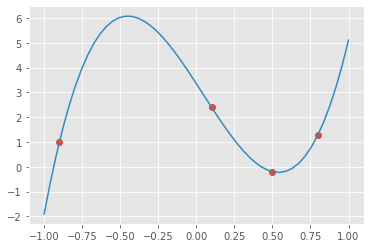

In [23]:
x1 = np.array([-0.9, 0.1, 0.5, 0.8]) # points where we know values
y = np.array([1, 2.4, -0.2, 1.3])    # values at those points

k = 4
plt.plot(x1, y, 'o')
B = np.vander(x1, k, increasing=True)  # Vandermonde matrix at the known points
Q, R = gram_schmidt_naive(B)
p = np.linalg.solve(R, Q.T @ y)      # Compute the polynomial coefficients
plt.plot(x, np.vander(x,k,increasing=True) @ p)  # Plot the polynomial evaluated at all points
print('B =', B, '\np =', p)

In [24]:
m = 20
V = np.vander(np.linspace(-1,1,m), increasing=True)
Q, R = gram_schmidt_naive(V)

def qr_test(qr, V):
    Q, R = qr(V)
    m = len(Q.T)
    print('{:20} {:.2e} {:.2e}'.format(
        qr.__name__,
        np.linalg.norm(Q @ R - V),
        np.linalg.norm(Q.T @ Q - np.eye(m))))
    
qr_test(gram_schmidt_naive, V)
qr_test(np.linalg.qr, V)

gram_schmidt_naive   7.33e-16 9.11e-09
qr                   2.53e-15 2.36e-15


In [25]:
def gram_schmidt_classical(A):
    Q = np.zeros_like(A)
    R = np.zeros((len(A.T),len(A.T)))
    for i in range(len(Q.T)):
        v = A[:,i].copy()
        R[:i,i] = Q[:,:i].T @ v
        v -= Q[:,:i] @ R[:i,i]
        R[i,i] = np.linalg.norm(v)
        Q[:,i] = v / R[i,i]
    return Q, R

qr_test(gram_schmidt_classical, V)

gram_schmidt_classical 9.27e-16 1.42e+00


Classical Gram-Schmidt is highly parallel, but unstable, as evidenced by the lack of orthogonality in $Q$.

### Right-looking algorithms

The implementations above have been "left-looking"; when working on column $i$, we compare it only to columns to the left (i.e., $j < i$).  We can reorder the algorithm to look to the right by projecting $q_i$ out of all columns $j > i$.  This algorithm is stable while being just as parallel as `gram_schmidt_classical`.

In [26]:
def gram_schmidt_modified(A):
    Q = A.copy()
    R = np.zeros((len(A.T), len(A.T)))
    for i in range(len(Q.T)):
        R[i,i] = np.linalg.norm(Q[:,i])
        Q[:,i] /= R[i,i]
        R[i,i+1:] = Q[:,i].T @ Q[:,i+1:]
        Q[:,i+1:] -= np.outer(Q[:,i], R[i,i+1:])
    return Q, R

qr_test(gram_schmidt_modified, V)

gram_schmidt_modified 8.19e-16 1.33e-08


In [27]:
gram_schmidt_modified(V)[1].diagonal()

array([4.47213595e+00, 2.71448357e+00, 1.46813359e+00, 7.74796385e-01,
       4.02707125e-01, 2.06254652e-01, 1.03916396e-01, 5.13647014e-02,
       2.48256542e-02, 1.16864792e-02, 5.33340139e-03, 2.34677736e-03,
       9.88975643e-04, 3.95848907e-04, 1.48880592e-04, 5.18578998e-05,
       1.63841809e-05, 4.54454652e-06, 1.04299294e-06, 1.71466983e-07])

### Stability

Since QR factorization is unique (with positive diagonal of $R$), if we were to work in exact arithmetic, classical and modified Gram-Schmidt would produce the same result.  Note that modified Gram-Schmidt sequentially applies the projections into the orthogonal complement of each column $q_j$ of $Q$.  That is, given a vector $x$, we sequentially project $(I - q_j q_j^T) x$ for each column $j < i$.  This is equivalent to projecting all those columns at once due to
\begin{align}
  (I - q_1 q_1^T) (I - q_0 q_0^T) x &= \big(I - q_0 q_0^T - q_1 q_1^T + q_1 \underbrace{q_1^T q_0}_{=0} q_0^T \big) x \\
  &= (I - q_0 q_0^T - q_1 q_1^T) x \\
  &= (I - Q Q^T) x
\end{align}
where $Q = [q_0 | q_1 ]$.  This identity can be applied recursively to convert modified Gram-Schmidt to classical, but the identity is not exact in finite precision arithmetic.

norm(v) 1.4245900685395503
r 1.7146698313477946e-07


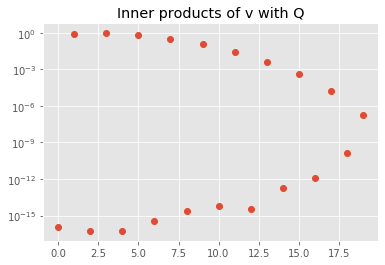

In [28]:
v = V[:,-1]
print('norm(v)', np.linalg.norm(v))
print('r', R[-1,-1])
plt.semilogy(np.abs(Q.T @ v), 'o')
plt.title('Inner products of v with Q');

[1, -0.6666666666666666, -0.22222222222222224, -0.07407407407407408, -0.024691358024691364, -0.008230452674897124, -0.0027434842249657075, -0.0009144947416552361, -0.0003048315805517454, -0.00010161052685058181, -3.3870175616860605e-05, -1.1290058538953536e-05, -3.763352846317846e-06, -1.2544509487726156e-06, -4.181503162575385e-07, -1.3938343875251286e-07, -4.6461146250837626e-08, -1.548704875027921e-08, -5.162349583426404e-09, -1.7207831944754682e-09, -5.735943981584894e-10]
seq   abs 5.9562e-22  rel 2.0768e-12
block abs 5.3534e-17  rel 1.8666e-07
numpy abs 7.4670e-17  rel 2.6036e-07


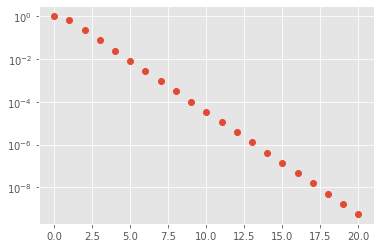

In [29]:
def test_sum(n):
    def gen(first, n, factor=2/3):
        l = [first]
        ifactor = 1-factor
        for i in range(n):
            l.append(-first * factor * ifactor**i)
        return l, first * ifactor**n
    def sum_seq(numbers):
        s = 0
        for a in numbers:
            s += a
        return s
    def sum_block(numbers):
        s = 0
        for a in numbers[1:]:
            s += a
        return numbers[0] + s
    numbers, exact = gen(1, n)
    print(numbers)
    plt.semilogy(np.abs(numbers), 'o')
    seq_err = sum_seq(numbers) - exact
    block_err = sum_block(numbers) - exact
    numpy_err = np.sum(numbers) - exact
    print('seq   abs {:.4e}  rel {:.4e}'.format(seq_err, seq_err/exact))
    print('block abs {:.4e}  rel {:.4e}'.format(block_err, block_err/exact))
    print('numpy abs {:.4e}  rel {:.4e}'.format(numpy_err, numpy_err/exact))
    
test_sum(20)

### Householder triangularization

Gram-Schmidt methods perform triangular transformations to build an orthogonal matrix.  As we have seen, $X = QR$ is satisfied accurately, but $Q$ may not be orthogonal when $X$ is ill-conditioned.  Householder triangularization instead applies a sequence of orthogonal transformations to build a triangular matrix.

$$ \underbrace{Q_{n-1} \dotsb Q_0}_{Q^T} A = R $$

The structure of the algorithm is

$$ \underbrace{\begin{bmatrix} * & * & * \\ * & * & * \\ * & * & * \\ * & * & * \\ * & * & * \\ \end{bmatrix}}_{A} \to
\underbrace{\begin{bmatrix} * & * & * \\ 0 & * & * \\ 0 & * & * \\ 0 & * & * \\ 0 & * & * \\ \end{bmatrix}}_{Q_0 A} \to
\underbrace{\begin{bmatrix} * & * & * \\ 0 & * & * \\ 0 & 0 & * \\ 0 & 0 & * \\ 0 & 0 & * \\ \end{bmatrix}}_{Q_1 Q_0 A} \to
\underbrace{\begin{bmatrix} * & * & * \\ 0 & * & * \\ 0 & 0 & * \\ 0 & 0 & 0 \\ 0 & 0 & 0 \\ \end{bmatrix}}_{Q_2 Q_1 Q_0 A}
$$

where the elementary orthogonal matrices $Q_i$ chosen to introduce zeros below the diagonal in the $i$th column of $R$.
Each of these transformations will have the form
$$Q_i = \begin{bmatrix} I_i & 0 \\ 0 & F \end{bmatrix}$$
where $F$ is a "reflection" that achieves
$$ F x = \begin{bmatrix} \lVert x \rVert \\ 0 \\ 0 \\ \vdots \end{bmatrix} $$
where $x$ is the column of $R$ from the diagonal down.
This transformation is a reflection across a plane with normal $v = Fx - x = \lVert x \rVert e_1 - x$.

![Householder Reflector (Trefethen and Bau, 1999)](img/TB-Householder.png)

The reflection, as depected above by Trefethen and Bau (1999) can be written $F = I - 2 \frac{v v^T}{v^T v}$.

In [30]:
A = np.random.rand(4, 4)
A = A + A.T # Random symmetric matrix
A

array([[0.50392629, 1.0442294 , 0.75156149, 0.95282076],
       [1.0442294 , 0.66665305, 0.71820806, 1.24467592],
       [0.75156149, 0.71820806, 1.25259254, 1.68418759],
       [0.95282076, 1.24467592, 1.68418759, 1.32129658]])

In [31]:
A.T - A

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [32]:
from scipy.linalg import block_diag
np.set_printoptions(precision=4)

def reflector(v):
    return np.eye(len(v)) - 2*np.outer(v, v)

v = A[1:,0].copy()
v[0] += np.linalg.norm(v)
v = v / np.linalg.norm(v)
F = reflector(v)
Q_0 = block_diag(np.eye(1), F)
Q_0

array([[ 1.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    , -0.6522, -0.4694, -0.5951],
       [ 0.    , -0.4694,  0.8666, -0.1691],
       [ 0.    , -0.5951, -0.1691,  0.7856]])

In [33]:
v = A[:,0].copy()
v[0] = 0
print(v)
v[1] += np.linalg.norm(v[1:])
v /= np.linalg.norm(v)
reflector(v)

[0.     1.0442 0.7516 0.9528]


array([[ 1.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    , -0.6522, -0.4694, -0.5951],
       [ 0.    , -0.4694,  0.8666, -0.1691],
       [ 0.    , -0.5951, -0.1691,  0.7856]])

In [34]:
Q_0 @ A

array([[ 5.0393e-01,  1.0442e+00,  7.5156e-01,  9.5282e-01],
       [-1.6010e+00, -1.5127e+00, -2.0588e+00, -2.3888e+00],
       [ 8.2184e-17,  9.8993e-02,  4.6358e-01,  6.5183e-01],
       [ 5.5066e-18,  4.5964e-01,  6.8389e-01,  1.2485e-02]])

In [35]:
A @ Q_0

array([[ 5.0393e-01, -1.6010e+00,  8.2184e-17,  5.5066e-18],
       [ 1.0442e+00, -1.5127e+00,  9.8993e-02,  4.5964e-01],
       [ 7.5156e-01, -2.0588e+00,  4.6358e-01,  6.8389e-01],
       [ 9.5282e-01, -2.3888e+00,  6.5183e-01,  1.2485e-02]])

In [36]:
def householder_Q_times(V, x):
    """Apply orthogonal matrix represented as list of Householder reflectors"""
    y = x.copy()
    for i in reversed(range(len(V))):
        y[i:] -= 2 * V[i] * V[i].dot(y[i:])
    return y

def qr_householder1(A):
    "Compute QR factorization using naive Householder reflection"
    m, n = A.shape
    R = A.copy()
    V = []
    for i in range(n):
        v = R[i:,i].copy()
        v[0] -= np.linalg.norm(v)
        v = v/np.linalg.norm(v)     # Normalized reflector plane
        R[i:,i:] -= 2 * np.outer(v, v @ R[i:,i:])
        V.append(v)                    # Storing reflectors is equivalent to storing orthogonal matrix
    Q = np.eye(m, n)
    for i in range(n):
        Q[:,i] = householder_Q_times(V, Q[:,i])
    return Q, np.triu(R[:n,:])

qr_test(qr_householder1, np.array([[1.,2],[3,4],[5,6]]))

qr_householder1      1.88e-15 3.17e-16


In [37]:
qr_test(qr_householder1, V)
qr_test(np.linalg.qr, V)
qr_test(gram_schmidt_modified, V)

qr_householder1      3.11e-15 2.70e-15
qr                   2.53e-15 2.36e-15
gram_schmidt_modified 8.19e-16 1.33e-08


In [38]:
np.linalg.cond(V)

272240823.70513624

### Choice of two projections

It turns out our implementation has a nasty deficiency.

In [39]:
qr_test(qr_householder1, np.eye(1))

qr_householder1      nan nan


<ipython-input-36-7c16fa44a4d4>:16: RuntimeWarning: invalid value encountered in true_divide
  v = v/np.linalg.norm(v)     # Normalized reflector plane


In [40]:
qr_test(qr_householder1, np.eye(3,2))

qr_householder1      nan nan


<ipython-input-36-7c16fa44a4d4>:16: RuntimeWarning: invalid value encountered in true_divide
  v = v/np.linalg.norm(v)     # Normalized reflector plane


Inside `qr_householder1`, we have the lines
```
        x = R[i:,i]
        v = -x
        v[0] += numpy.linalg.norm(x)
        v = v/numpy.linalg.norm(v)     # Normalized reflector plane
```
What happens when $$x = \begin{bmatrix}1 \\ 0 \end{bmatrix}$$
(i.e., the column of $R$ is already upper triangular)?

We are trying to define a reflector plane (via its normal vector) from the zero vector,
$$v = \lVert x \rVert e_0 - x .$$
When we try to normalize this vector, we divide zero by zero and the algorithm breaks down (`nan`).  Maybe we just need to test for this special case and "skip ahead" when no reflection is needed?  And if so, how would we define $Q$?

In [41]:
qr_test(qr_householder1, np.array([[1.,1], [2e-8,1]]))
print(qr_householder1(np.array([[1.,1], [2e-8,1]])))

qr_householder1      2.20e-09 4.44e-16
(array([[ 1.0000e+00, -2.2204e-08],
       [ 2.2204e-08,  1.0000e+00]]), array([[1., 1.],
       [0., 1.]]))


The error $QR - A$ is still $10^{-8}$ for this very well-conditioned matrix so something else must be at play here.

![Choosing the better of two Householder reflectors (Trefethen and Bau, 1999).](img/TB-Householder2.png)

In [42]:
def qr_householder2(A):
    "Compute QR factorization using Householder reflection"
    m, n = A.shape
    R = A.copy()
    V = []
    for i in range(n):
        v = R[i:,i].copy()
        v[0] += np.sign(v[0]) * np.linalg.norm(v) # Choose the further of the two reflections
        v = v/np.linalg.norm(v)     # Normalized reflector plane
        R[i:,i:] -= np.outer(v, 2 * (v.T @ R[i:,i:]))
        V.append(v)                    # Storing reflectors is equivalent to storing orthogonal matrix
    Q = np.eye(m, n)
    for i in range(n):
        Q[:,i] = householder_Q_times(V, Q[:,i])
    return Q, np.triu(R[:n,:])

qr_test(qr_householder2, np.eye(3,2))
qr_test(qr_householder2, np.array([[1.,1], [1e-8,1]]))
print(qr_householder2(np.array([[1.,1], [1e-8,1]])))

qr_test(qr_householder2, V)

qr_householder2      0.00e+00 0.00e+00
qr_householder2      0.00e+00 0.00e+00
(array([[-1.e+00,  1.e-08],
       [-1.e-08, -1.e+00]]), array([[-1., -1.],
       [ 0., -1.]]))
qr_householder2      5.20e-15 3.49e-15


We now have a usable implementation of Householder QR.  There are some further concerns for factoring rank-deficient matrices.  We will visit the concept of pivoting later, in the context of LU and Cholesky factorization.

## Condition number of a matrix

We may have informally referred to a matrix as "ill-conditioned" when the columns are nearly linearly dependent, but let's make this concept for precise.  Recall the definition of (relative) condition number from the Rootfinding notes,

$$ \kappa = \max_{\delta x} \frac{|\delta f|/|f|}{|\delta x|/|x|} . $$

We understood this definition for scalar problems, but it also makes sense when the inputs and/or outputs are vectors (or matrices, etc.) and absolute value is replaced by vector (or matrix) norms.  Let's consider the case of matrix-vector multiplication, for which $f(x) = A x$.

$$ \kappa(A) = \max_{\delta x} \frac{\lVert A (x+\delta x) - A x \rVert/\lVert A x \rVert}{\lVert \delta x\rVert/\lVert x \rVert}
= \max_{\delta x} \frac{\lVert A \delta x \rVert}{\lVert \delta x \rVert} \, \frac{\lVert x \rVert}{\lVert A x \rVert} = \lVert A \rVert \frac{\lVert x \rVert}{\lVert A x \rVert} . $$

There are two problems here:

* I wrote $\kappa(A)$ but my formula depends on $x$.
* What is that $\lVert A \rVert$ beastie?

### Stack push: Matrix norms

Vector norms are built into the linear space (and defined in term of the inner product).  Matrix norms are *induced* by vector norms, according to

$$ \lVert A \rVert = \max_{x \ne 0} \frac{\lVert A x \rVert}{\lVert x \rVert} . $$

* This equation makes sense for non-square matrices -- the vector norms of the input and output spaces may differ.
* Due to linearity, all that matters is direction of $x$, so it could equivalently be written

$$ \lVert A \rVert = \max_{\lVert x \rVert = 1} \lVert A x \rVert . $$

### Stack pop

Now we understand the formula for condition number, but it depends on $x$.  Consider the matrix

$$ A = \begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix} . $$

* What is the norm of this matrix?
* What is the condition number when $x = [1,0]^T$?
* What is the condition number when $x = [0,1]^T$?

The condition number of matrix-vector multiplication depends on the vector.  The condition number of the matrix is the worst case (maximum) of the condition number for any vector, i.e.,

$$ \kappa(A) = \max_{x \ne 0} \lVert A \rVert \frac{\lVert x \rVert}{\lVert A x \rVert} .$$

If $A$ is invertible, then we can rephrase as

$$ \kappa(A) = \max_{x \ne 0} \lVert A \rVert \frac{\lVert A^{-1} (A x) \rVert}{\lVert A x \rVert} =
\max_{A x \ne 0} \lVert A \rVert \frac{\lVert A^{-1} (A x) \rVert}{\lVert A x \rVert} = \lVert A \rVert \lVert A^{-1} \rVert . $$

Evidently multiplying by a matrix is just as ill-conditioned of an operation as solving a linear system using that matrix.

In [43]:
def R_solve(R, b):
    """Solve Rx = b using back substitution."""
    x = b.copy()
    m = len(b)
    for i in reversed(range(m)):
        x[i] -= R[i,i+1:].dot(x[i+1:])
        x[i] /= R[i,i]
    return x

Q, R = np.linalg.qr(A)
x = np.array([1,2,3,4])
bfull = A @ x
breduced = Q.T @ bfull
print(np.linalg.norm(R_solve(R, breduced)
                     - np.linalg.solve(R, breduced)))
R_solve(R, breduced)

1.831026719408895e-15


array([1., 2., 3., 4.])

### Cost of Householder factorization

The dominant cost comes from the line
```Python
    R[i:,i:] -= 2 * numpy.outer(v, v.dot(R[i:,i:]))
```
were `R[i:,i:]` is an $(m-i)\times(n-i)$ matrix.
This line performs $2(m-i)(n-i)$ operations in `v.dot(R[i:,i:])`, another $(m-i)(n-i)$ in the "outer" product and again in subtraction.  As written, multiplication by 2 would be another $(m-i)(n-i)$ operations, but is only $m-i$ operations if we rewrite as
```Python
    w = 2*v
    R[i:,i:] -= numpy.outer(w, v.dot(R[i:,i:]))
```
in which case the leading order cost is $4(m-i)(n-i)$.  To compute the total cost, we need to sum over all columns $i$,
$$\begin{split} \sum_{i=1}^n 4(m-i)(n-i) &= 4 \Big[ \sum_{i=1}^n (m-n)(n-i) + \sum_{i=1}^n (n-i)^2 \Big] \\
&= 4 (m-n) \sum_{i=1}^n i + 4 \sum_{i=1}^n i^2 \\
&\approx 2 (m-n) n^2 + 4 n^3/3 \\
&= 2 m n^2 - \frac 2 3 n^3 .
\end{split}$$
Recall that Gram-Schmidt QR cost $2 m n^2$, so Householder costs about the same when $m \gg n$ and is markedly less expensive when $m \approx n$.

### Backward Stability of Housholder

In [44]:
def qr_test_backward(qr, n):
    from numpy.linalg import norm
    from numpy.random import randn
    R = np.triu(randn(n,n))
    Q, _ = np.linalg.qr(randn(n,n))
    A = Q @ R
    Q2, R2 = qr(A)
    print('# Forward error')
    print('Q error', norm(Q2 - Q))
    print('R error', norm(R2 - R) / norm(R))
    print('# Backward error')
    A2 = Q2 @ R2
    print('Q2.T @ Q2 - I', norm(Q2.T @ Q2 - np.eye(n)))
    print('Q2*R2 - A', norm(A2 - A) / norm(A))
    Q3, R3 = Q + 1e-5*randn(n,n), R + 1e-5*np.triu(randn(n,n))
    A3 = Q3 @ R3
    print('Q3*R3 - A', norm(A3 - A) / norm(A))
    
qr_test_backward(gram_schmidt_modified, 50)
#qr_test_backward(np.linalg.qr, 50)

# Forward error
Q error 9.999999992159404
R error 1.4397402047403205
# Backward error
Q2.T @ Q2 - I 0.0005596946144480917
Q2*R2 - A 2.814875852611351e-16
Q3*R3 - A 6.996121286733967e-05


## Least squares and the normal equations

A **least squares problem** takes the form: given an $m\times n$ matrix $A$ ($m \ge n$), find $x$ such that
$$ \lVert Ax - b \rVert $$
is minimized.  If $A$ is square and full rank, then this minimizer will satisfy $A x - b = 0$, but that is not the case in general because $b$ is not in the range of $A$.
The residual $A x - b$ must be orthogonal to the range of $A$.

* Is this the same as saying $A^T (A x - b) = 0$?
* If $QR = A$, is it the same as $Q^T (A x - b) = 0$?

In the quiz, we showed that $QQ^T$ is an orthogonal projector onto the range of $Q$.  If $QR = A$,
$$ QQ^T (A x - b) = QQ^T(Q R x - b) = Q (Q^T Q) R x - QQ^T b = QR x - QQ^T b = A x - QQ^T b . $$
So if $b$ is in the range of $A$, we can solve $A x = b$.  If not, we need only *orthogonally* project $b$ into the range of $A$.

### Solution by QR (Householder)

Solve $R x = Q^T b$.

* QR factorization costs $2 m n^2 - \frac 2 3 n^3$ operations and is done once per matrix $A$.
* Computing $Q^T b$ costs $4 (m-n)n + 2 n^2 = 4 mn - 2n^2$ (using the elementary reflectors, which are stable and lower storage than naive storage of $Q$).
* Solving with $R$ costs $n^2$ operations.  Total cost per right hand side is thus $4 m n - n^2$.

This method is stable and accurate.

### Solution by Cholesky

The mathematically equivalent form $(A^T A) x = A^T b$ are called the **normal equations**.  The solution process involves factoring the symmetric and positive definite $n\times n$ matrix $A^T A$.

* Computing $A^T A$ costs $m n^2$ flops, exploiting symmetry.
* Factoring $A^T A = R^T R$ costs $\frac 1 3 n^3$ flops.  The total factorization cost is thus $m n^2 + \frac 1 3 n^3$.
* Computing $A^T b$ costs $2 m n$.
* Solving with $R^T$ costs $n^2$.
* Solving with $R$ costs $n^2$.  Total cost per right hand side is thus $2 m n + 2 n^2$.

The product $A^T A$ is ill-conditioned: $\kappa(A^T A) = \kappa(A)^2$ and can reduce the accuracy of a least squares solution.

### Solution by Singular Value Decomposition

Next, we will discuss a factorization
$$ U \Sigma V^T = A $$
where $U$ and $V$ have orthonormal columns and $\Sigma$ is diagonal with nonnegative entries.
The entries of $\Sigma$ are called **singular values** and this decomposition is the **singular value decomposition** (SVD).
It may remind you of an eigenvalue decomposition $X \Lambda X^{-1} = A$, but
* the SVD exists for all matrices (including non-square and deficient matrices)
* $U,V$ have orthogonal columns (while $X$ can be arbitrarily ill-conditioned).
Indeed, if a matrix is symmetric and positive definite (all positive eigenvalues), then $U=V$ and $\Sigma = \Lambda$.
Computing an SVD requires a somewhat complicated iterative algorithm, but a crude estimate of the cost is $2 m n^2 + 11 n^3$.  Note that this is similar to the cost of $QR$ when $m \gg n$, but much more expensive for square matrices.
Solving with the SVD involves
* Compute $U^T b$ at a cost of $2 m n$.
* Solve with the diagonal $n\times n$ matrix $\Sigma$ at a cost of $n$.
* Apply $V$ at a cost of $2 n^2$.  The total cost per right hand side is thus $2 m n + 2n^2$.

#### Example: rank-deficient problem

In [45]:
X = np.array([[0, 1], [1, 3], [2, 5], [-1, -1]])
A = np.array([0*X[:,0]+1, X[:,0], X[:,1]]).T
b = X[:,0] - X[:,1] + .5
Q, R = np.linalg.qr(A)
c_qr = R_solve(R, Q.T @ b)
print(np.linalg.norm(c_qr), c_qr)
A @ c_qr - b

0.8452609621100825 [ 0.2071  0.4142 -0.7071]


array([ 0.0000e+00,  2.2204e-16,  4.4409e-16, -1.6653e-16])

In [46]:
U, S, V = np.linalg.svd(A, full_matrices=False)
c_svd = V.T @ ((U.T @ b) / S)
print(np.linalg.norm(c_svd), c_svd)
A @ c_svd - b

0.4564354645876387 [-0.0833 -0.1667 -0.4167]


array([-1.1102e-16, -4.4409e-16, -1.3323e-15,  4.4409e-16])

### Pseudoinverse

An alternative is to explicitly form the $n\times m$ pseudoinverse $A^\dagger = R^{-1} Q^T$ (at a cost of $mn^2$) at which point each right hand side costs $2 mn$.  Why might we do this?

* Lots of right hand sides
* Real-time solution

In [47]:
# Test accuracy of solver for an ill-conditioned square matrix

x = np.linspace(-1,1,19)
A = np.vander(x)
print('cond(A) = ', np.linalg.cond(A))
Q, R = np.linalg.qr(A)
print('cond(R^{-1} Q^T A) =', np.linalg.cond(np.linalg.solve(R, Q.T.dot(A))))
L = np.linalg.cholesky(A.T @ A)
print('cond(L^{-T} L^{-1} A^T A) =', 
      np.linalg.cond(np.linalg.solve(L.T, np.linalg.solve(L, A.T @ A))))

cond(A) =  90847309.61919233
cond(R^{-1} Q^T A) = 1.0000000105693043
cond(L^{-T} L^{-1} A^T A) = 1.3904370775408743


## The [Singular Value Decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition)

The SVD is the decomposition
$$ U \Sigma V^T = A $$
where $U$ and $V$ have orthonormal columns and $\Sigma$ is diagonal and nonnegative.
Evidenly an arbitrary matrix consists of
1. Orthogonal matrix -- rotation and reflection
2. Diagonal scaling (transforms a sphere into an ellipsoid aligned to the coordinate axes)
3. Orthogonal matrix -- rotation and reflection

It is typical to order the singular values in descending order.

The inverse has the same behavior:

$$ A^{-1} = V \Sigma^{-1} U^T $$

The matrix norm is the largest singular value

$$ \lVert A \rVert = \sigma_{\max} . $$

The largest value in $\Sigma^{-1}$ is $\sigma_\min^{-1}$, so

$$ \lVert A^{-1} \rVert = \sigma_\min^{-1} . $$

We showed previously that

$$\kappa(A) = \lVert A \rVert \, \lVert A^{-1} \rVert $$

so now we can also write

$$ \kappa(A) = \frac{\sigma_\max}{\sigma_\min} . $$

The SVD is a crucial tool in statistics and dimensionality reduction, often under names like

* [Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis)
* Proper Orthogonal Decomposition (POD)
* Karhunen-Loeve Expansion

In this context, one computes an SVD of a data matrix and finds that the spectrum $\Sigma$ decays rapidly and only the $k \ll n$ components larger than some threshold are "important".  The dense matrix can thus be approximated as

$$ \hat U \hat \Sigma \hat V^T $$

by keeping only the first (largest) $k$ columns.  This reduces the storage from $mn$ entries to $mk + kn$ entries.

## Tinkering in class

1179.2513755430696


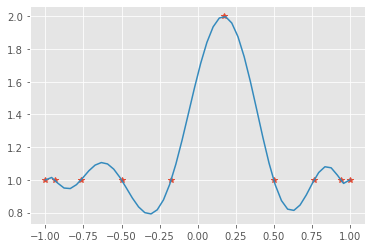

In [48]:
m = 10
x = np.cos(np.linspace(0, np.pi, m))
f = 1.0*(x > 0) + (x < 0.5)
A = np.vander(x)
Q, R = np.linalg.qr(A)
p = np.linalg.solve(R, Q.T @ f)
y = np.linspace(-1,1,50)
g = np.vander(y, m).dot(p)

plt.plot(x, f, '*')
plt.plot(y, g)
print(np.linalg.cond(A))

In [49]:
'%10e' % np.linalg.cond(np.vander(np.linspace(-1,1,100),20))

'7.206778e+06'